# nukleus jupyter example

  

In [1]:
from nukleus.draw import Draw, Dot, Label, Line, Element
from nukleus import netlist, Circuit, schema_to_spice
from nukleus.Plot import plot

In [2]:
draw = Draw(library_path=['/usr/share/kicad/symbols'])
draw.add(Label("INPUT"))
draw.add(Line())
draw.add(Element("R1", "Device:R", vnalue="100k").rotate(90))
draw.add(Line())
draw.add(Element("U1", "Amplifier_Operational:TL072", unit=1,
                 Spice_Netlist_Enabled='Y',
                 Spice_Primitive='',
                 Spice_Model='tl072c').anchor(2))
draw.add(Line().at(draw.U1[1].getPins()['1']))
draw.add(( dot1 := Dot()))
draw.add(Line())
draw.add(Label("OUTPUT"))
draw.add(Line().up().at(dot1).length(draw.unit*4))
draw.add(Line().tox(draw.U1[1].getPins()['3']))
draw.add(Line().toy(draw.U1[1].getPins()['3']))
draw.add(Line().tox(draw.U1[1].getPins()['3']))

draw.add(Element("U1", "Amplifier_Operational:TL072", unit=3).at((50, 50)))
draw.add(Element("+15V", "power:+15V").at(draw.U1[3].getPins()['8']))
draw.add(Element("-15V", "power:-15V").at(draw.U1[3].getPins()['4']).rotate(180))

!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']
!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']
!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']
!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']
!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']
!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']
!!! Library ['version', '20211014']
!!! Library ['generator', 'kicad_symbol_editor']


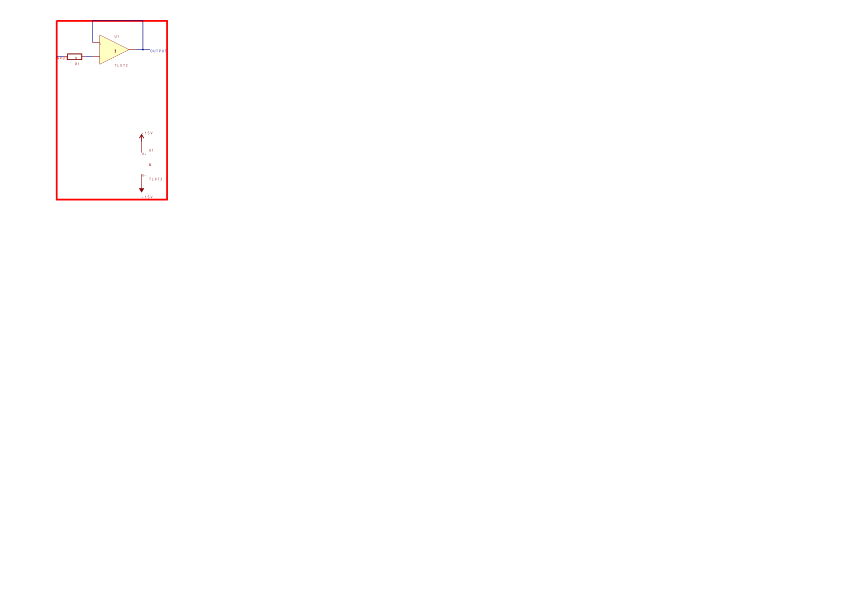

In [4]:
plot(draw, image_type='svg')

In [6]:
nl = netlist(draw)
circuit = Circuit()
schema_to_spice(draw, circuit, nl)
print(circuit)

R1 1 INPUT R
.end

